# Sourmash gather result analysis - unweighted_vs_biome plot -L3

> The graph is focusing solely on the average unweighted match percentages along with their standard deviations for each biome type. Each biome type is color-coded for clearer visualization.
> 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('/Users/ZYZhao/projects/AL/onek/analysis/join_3k.csv')
len(data)

2867

In [9]:
data.head()

,accession,ref_f_unweighted,ref_f_weighted,n_matches,biome3
0,DRR014782,0.733621,0.949541,12389,Host-associated:Mammals:Respiratory system
1,DRR014785,0.728105,0.946977,13328,Host-associated:Mammals:Respiratory system
2,DRR019499,0.268765,0.259064,21126,Host-associated:Insecta:Digestive system
3,DRR042462,0.901071,0.965085,3213,Host-associated:Human:Digestive system
4,DRR042463,0.815821,0.937989,4229,Host-associated:Human:Digestive system


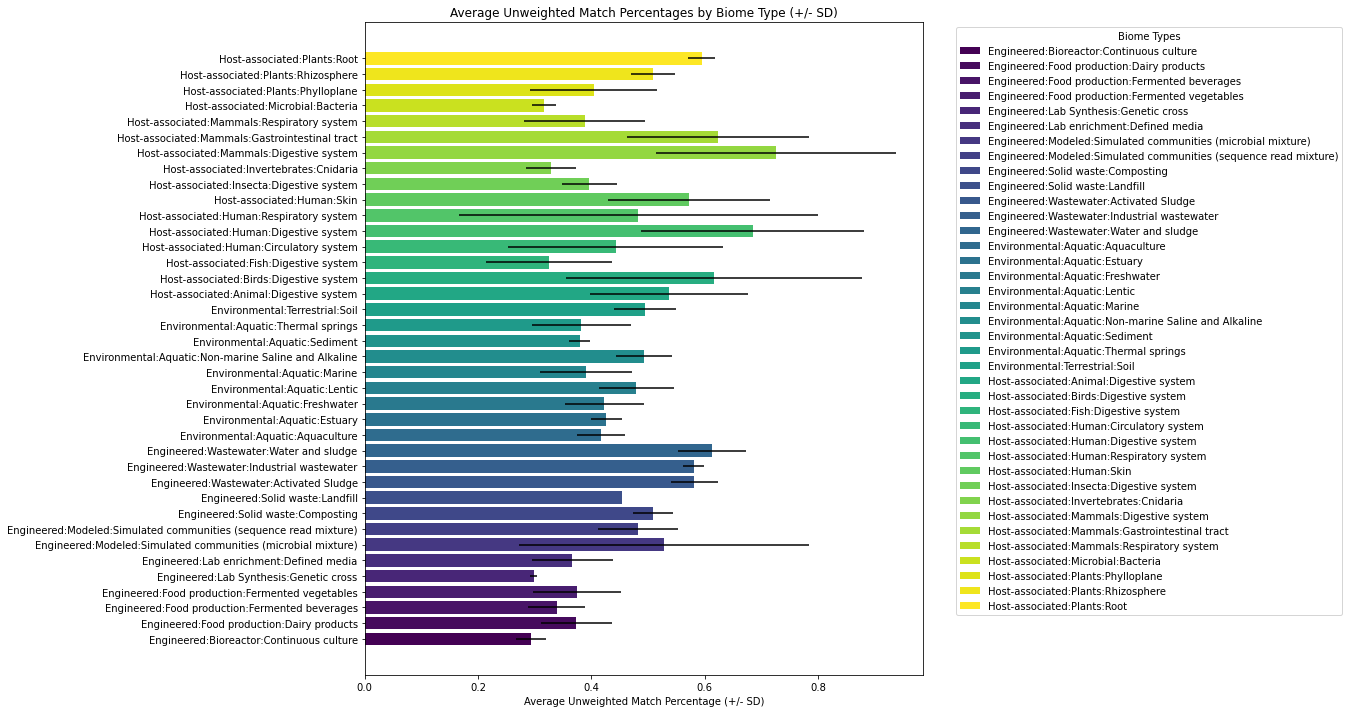

In [10]:
# Group the data by biome type and calculate the average and standard deviation for unweighted match percentages
biome_analysis = data.groupby('biome3').agg(
    avg_ref_f_unweighted=('ref_f_unweighted', 'mean'),
    std_ref_f_unweighted=('ref_f_unweighted', 'std')
).reset_index()

# Handle missing values for standard deviation
biome_analysis['std_ref_f_unweighted'] = biome_analysis['std_ref_f_unweighted'].fillna(0)

# Create a color map based on the unique biome types
biome_types = biome_analysis['biome3'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(biome_types)))
color_map = dict(zip(biome_types, colors))

# Set up the plotting area
fig, ax = plt.subplots(figsize=(10, 12))

# Plotting with color coding and error bars for standard deviation
biome_legend = {}  # to store legend handles
for biome, color in color_map.items():
    subset = biome_analysis[biome_analysis['biome3'] == biome]
    bars = ax.barh(subset['biome3'], subset['avg_ref_f_unweighted'], xerr=subset['std_ref_f_unweighted'], color=color)
    if biome not in biome_legend:  # add to legend only once
        biome_legend[biome] = bars[0]

ax.set_xlabel('Average Unweighted Match Percentage (+/- SD)')
ax.set_title('Average Unweighted Match Percentages by Biome Type (+/- SD)')
ax.legend(biome_legend.values(), biome_legend.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', title="Biome Types")

plt.show()